<a href="https://colab.research.google.com/github/MeriemTerki/Optical-Character-Recognition/blob/main/Optical_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import cv2 
import pytesseract

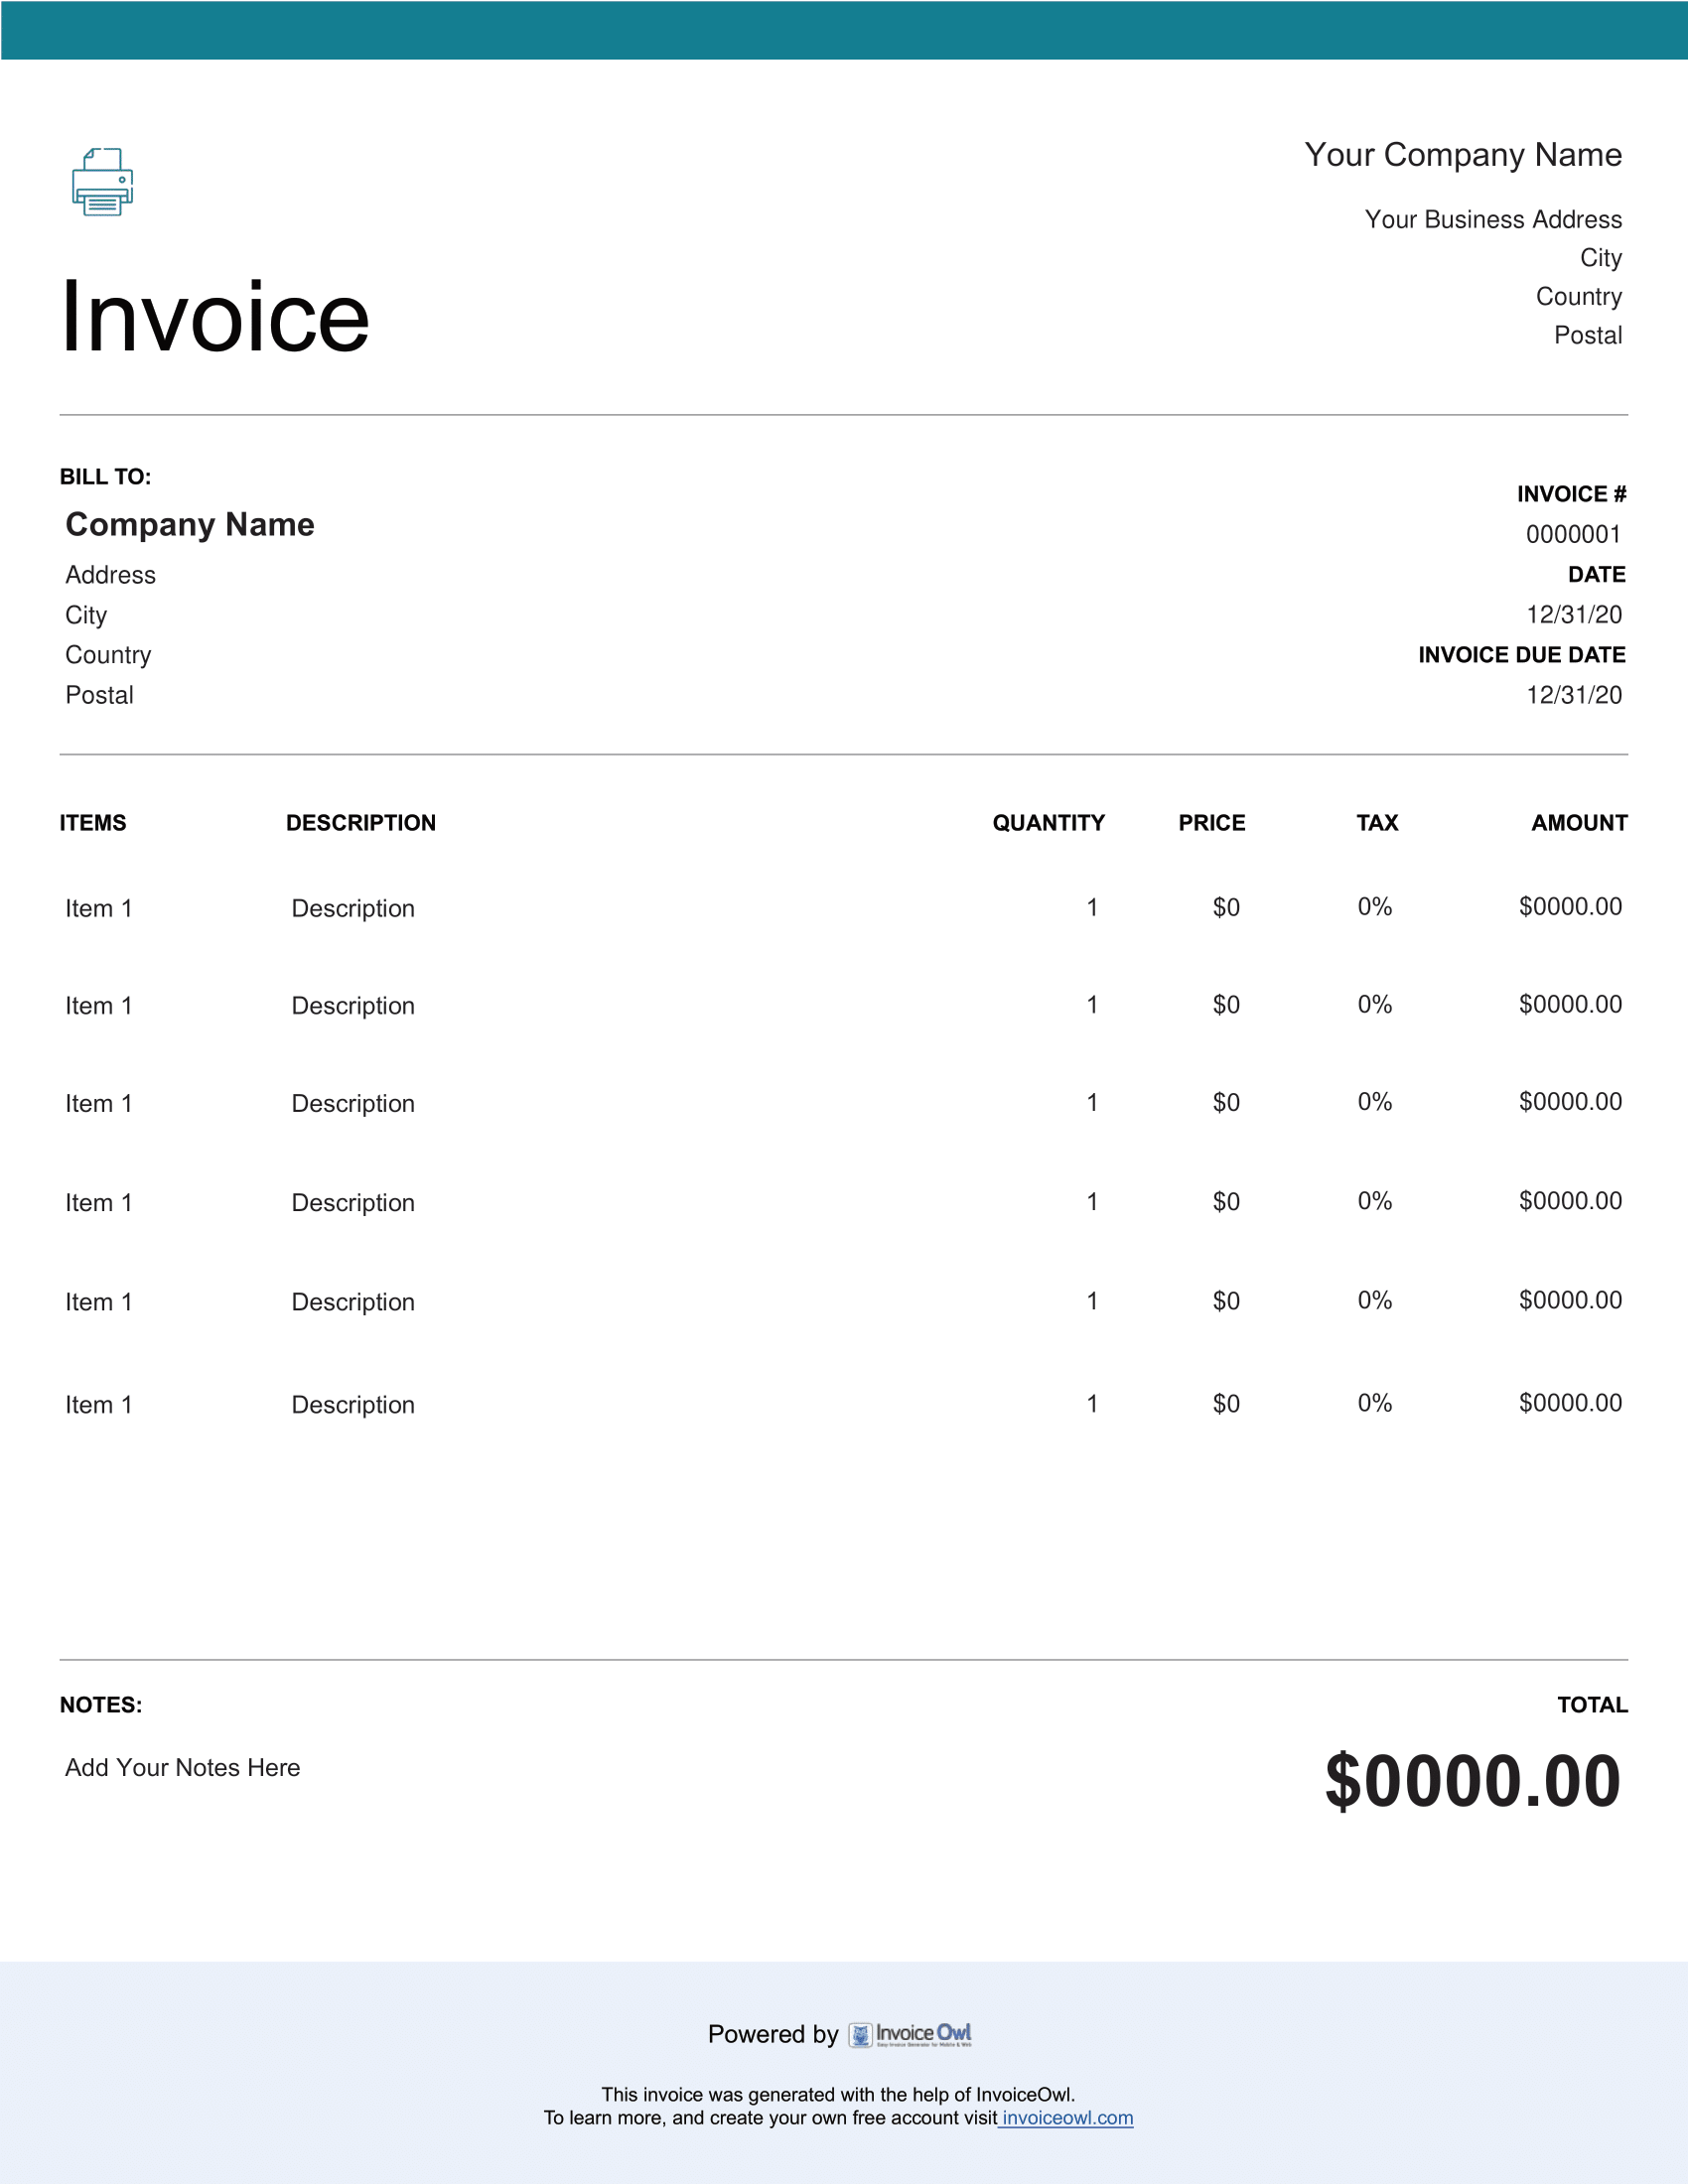

In [ ]:
image = Image.open("/content/drive/MyDrive/DeepLearningProjects/Optical Character Recognition/download-pdf-invoice-template-1.png")
image

## I. Extract Text From Photo:

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DeepLearningProjects/Optical Character Recognition/download-pdf-invoice-template-1.png')

custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(img,config=custom_config)
print(text)

a Your Company Name

Your Business Address

City

. Country

Nn VO | ce Postal
BILL TO:

INVOICE #

Company Name 0000001

Address DATE

City 12/31/20

Country INVOICE DUE DATE

Postal 12/31/20

ITEMS DESCRIPTION QUANTITY PRICE TAX AMOUNT

Item 1 Description 1 $0 0% $0000.00

Item 1 Description 1 $0 0% $0000.00

Item 1 Description 1 $0 0% $0000.00

Item 1 Description 1 $0 0% $0000.00

Item 1 Description 1 $0 0% $0000.00

Item 1 Description 1 $0 0% $0000.00

NOTES: TOTAL

Add Your Notes Here 0 0 0 0 0 0

a
Powered by |) Invoice Owl
This invoice was generated with the help of InvoiceOwl.
To learn more, and create your own free account visit invoiceowl.com



## II. DRAW BOXES AROUND THE TARGET WORD:

In [ ]:
# make a copy of this image to draw in
image_copy = img.copy()
# the target word to search for
target_word = "item"
# get all data from the image
data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
print(data.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [ ]:
display(data['text'])

['',
 '',
 '',
 '',
 'iS',
 '',
 '',
 '',
 'Your',
 'Company',
 'Name',
 '',
 '',
 '',
 'Your',
 'Business',
 'Address',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 'City',
 '',
 '',
 '.',
 'Country',
 '',
 '',
 'Nn',
 'VO',
 '|',
 'ce',
 'Postal',
 '',
 '',
 'BILL',
 'TO:',
 '',
 '',
 'INVOICE',
 '#',
 '',
 '',
 'Company',
 'Name',
 '0000001',
 '',
 'Address',
 'DATE',
 '',
 'City',
 '12/31/20',
 '',
 'Country',
 'INVOICE',
 'DUE',
 'DATE',
 '',
 'Postal',
 '12/31/20',
 '',
 'ITEMS',
 'DESCRIPTION',
 'QUANTITY',
 'PRICE',
 'TAX',
 'AMOUNT',
 '',
 'item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$0000.00',
 '',
 'item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$0000.00',
 '',
 'item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$0000.00',
 '',
 'item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$0000.00',
 '',
 'tem',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$0000.00',
 '',
 'item',
 '1',
 'Description',
 '1',
 '$0',
 '0

In [ ]:
# get all occurences of the that word
word_occurences = [ x for x, word in enumerate(data["text"]) if word == target_word ]
word_occurences

[83, 91, 99, 107, 123]

In [ ]:
for occ in word_occurences:
    # extract the width, height, top and left position for that detected word
    x = data["left"][occ]
    y = data["top"][occ]
    w = data["width"][occ]
    h = data["height"][occ]
    # draw the rectangular:
    image_copy = cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

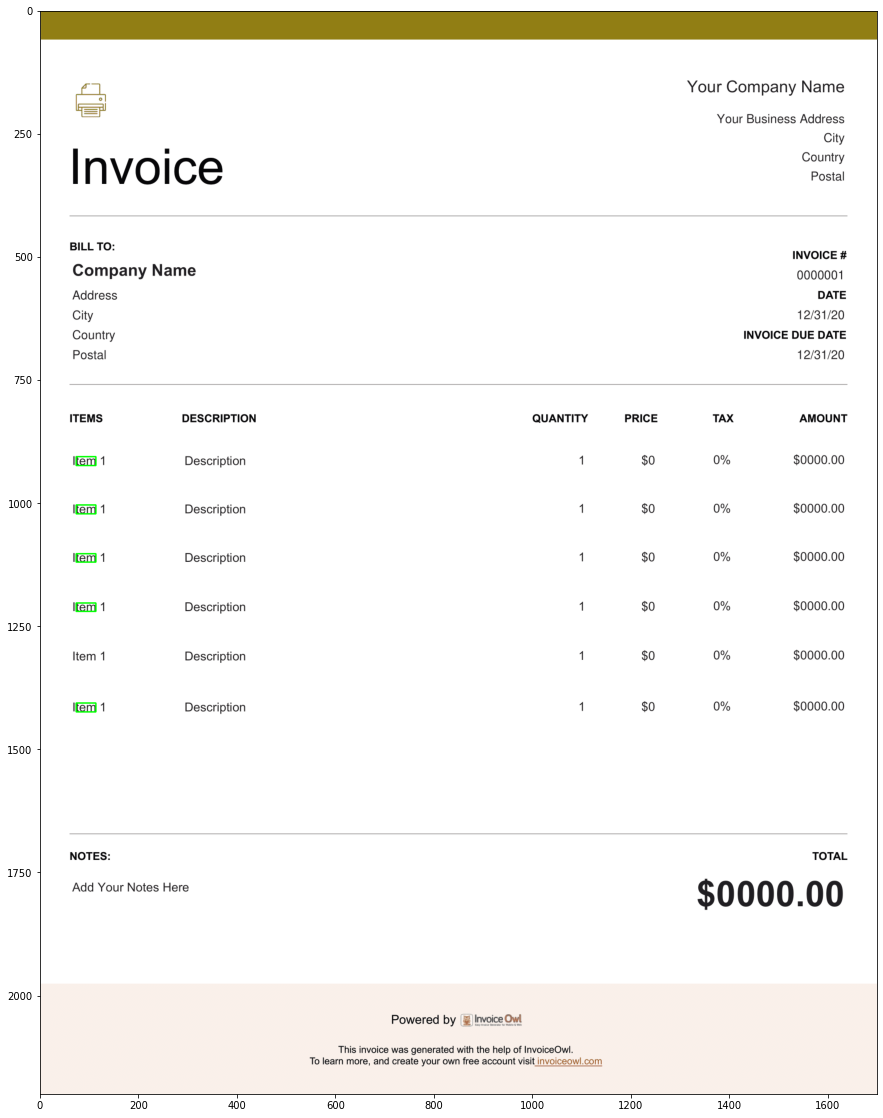

In [ ]:
plt.imsave('all_item_word.png', image_copy)
plt.figure(figsize=(15,20))
plt.imshow(image_copy)
plt.show()
#cv2.waitKey(0)

## III. Getting boxes around all word:

In [ ]:
image_all= img.copy()

In [ ]:
n_boxes = len(data['text'])
for i in range(n_boxes):
    # extract the width, height, top and left position for that detected word
    x = data["left"][i]
    y = data["top"][i]
    w = data["width"][i]
    h = data["height"][i]
    # draw the rectangular:
    image_all = cv2.rectangle(image_all, (x, y), (x + w, y + h), (0, 255, 0), 2)

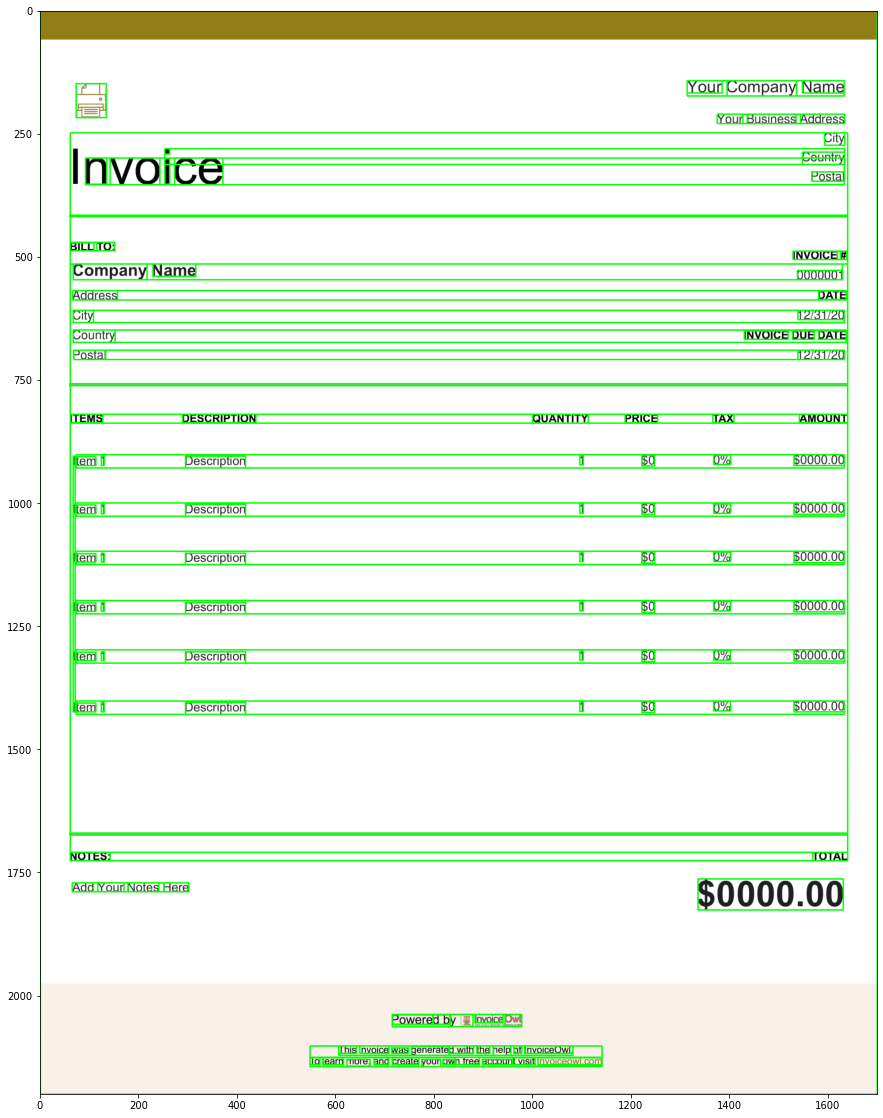

In [ ]:
plt.imsave('image_all.png', image_all)
plt.figure(figsize=(15,20))
plt.imshow(image_all)
plt.show()

## IV. Getting boxes around all single character:

In [ ]:
import cv2
import pytesseract

img = cv2.imread('/content/drive/MyDrive/DeepLearningProjects/Optical Character Recognition/download-pdf-invoice-template-1.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

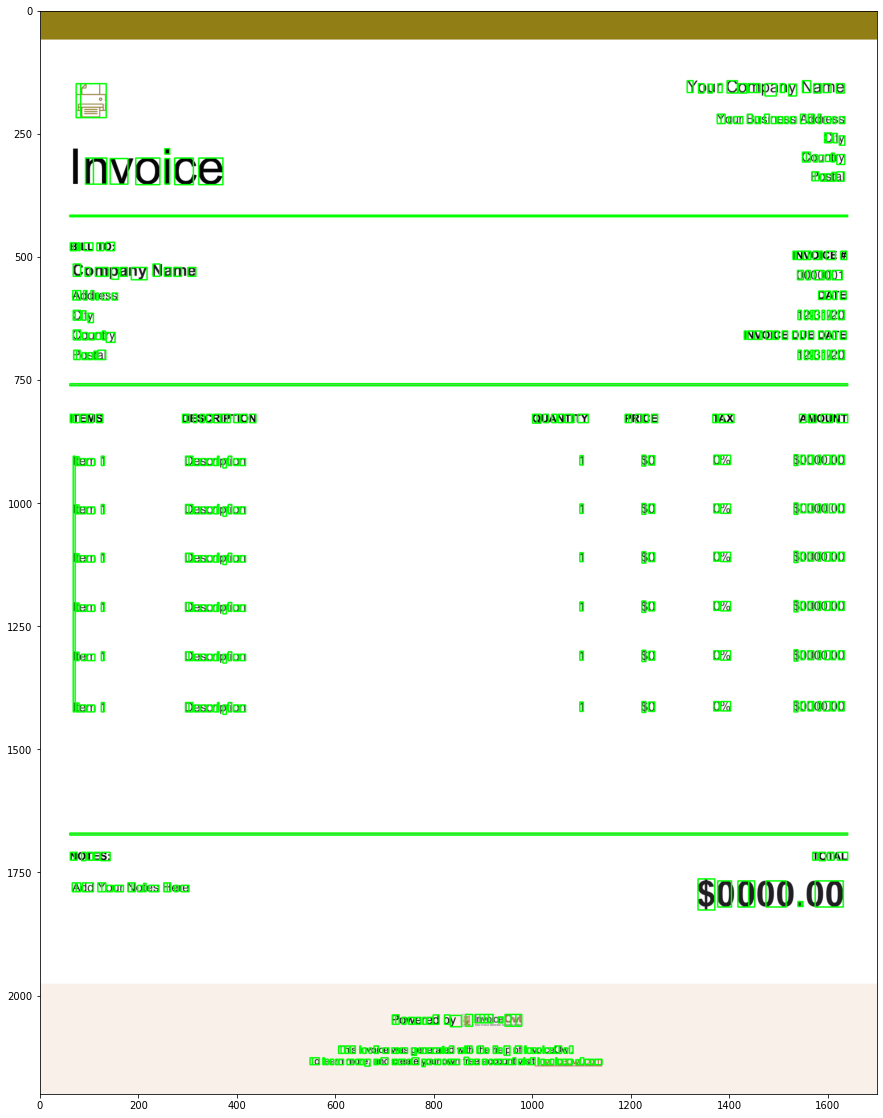

In [ ]:
plt.figure(figsize=(15,20))
plt.imshow(img)
plt.show()

## V. Detect Only Digit:

In [ ]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
num= pytesseract.image_to_string(img, config=custom_config)
print(num)

Youn Company Name
v= Moon Basiogss Bildess
Diy
Invoice om
VJ IKIRe
SHLD TD: INVOICE #
Company Name coonen
Adduess OATE
Dig apIG0ue0
Donny INVOICE DUE DATE
apIG0ue0
TENS DESCRIPTION QUANTITY PRICE 9.4 AMOUNT
1 Desodipfion a 80 soo0g00
1 Desodipfion a 80 s0ue000
a Desorption a 80 8000000
a Desorption a 80 8000000
a Desorption a 80 8000000
1 Desodipfion a 80 soo0g00
mOnAD
(Add Youn Nlofes Here $0000
$0000.00
(08 lowtice mas generate wifi fe fe[p 61 tovolcethe0
(e200 mong) eid eceate gaun own fise account uésii loroloen.elcom



## VI. Detect Only Text:

In [ ]:
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
text = pytesseract.image_to_string(img, config=custom_config)
print(text)

Youn Company Name
v= Moon Basiogss Bildess
Diy
Invoice om
VJ IKIRe
SHLD TD: INVOICE #
Company Name coonen
Adduess OATE
Dig apIG0ue0
Donny INVOICE DUE DATE
apIG0ue0
TENS DESCRIPTION QUANTITY PRICE 9.4 AMOUNT
1 Desodipfion a 80 soo0g00
1 Desodipfion a 80 s0ue000
a Desorption a 80 8000000
a Desorption a 80 8000000
a Desorption a 80 8000000
1 Desodipfion a 80 soo0g00
mOnAD
(Add Youn Nlofes Here $0000
$0000.00
(08 lowtice mas generate wifi fe fe[p 61 tovolcethe0
(e200 mong) eid eceate gaun own fise account uésii loroloen.elcom

